In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [3]:
netflix = pd.read_csv('NetflixOriginals.csv',encoding='ISO-8859-1',parse_dates=['Premiere'])
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [4]:
netflix['Rating Quality'] = netflix['IMDB Score'].map(lambda x: "Poor Rating" if x < 4 
                                                                              else("Mediocre Rating" if x < 6 
                                                                              else ("Above Average Rating" if x < 8 
                                                                              else " Exceptional Rating")))
netflix['Film Length Group'] = netflix['Runtime'].map(lambda x: "Short Film" if x < 60 else ("Medium Length Film" if x < 120 else "Long Film"))
netflix['Release Year'] = netflix['Premiere'].dt.year
netflix['Release Month'] = netflix['Premiere'].dt.month
netflix['Release Day'] = netflix['Premiere'].dt.day
netflix['RMonth Text'] = netflix['Release Month'].map({1:'January',2:'February',3:'March',4:'April',5:'June',6:'July',
                                                       7:'July', 8:'August', 9:'September',10:'October',11:'November',12:'December'})
                                        
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Rating Quality,Film Length Group,Release Year,Release Month,Release Day,RMonth Text
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Poor Rating,Short Film,2019,8,5,August
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Poor Rating,Medium Length Film,2020,8,21,August
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Poor Rating,Medium Length Film,2019,12,26,December
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Poor Rating,Medium Length Film,2018,1,19,January
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Poor Rating,Medium Length Film,2020,10,30,October


In [5]:
netflix.shape

(584, 12)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              584 non-null    object        
 1   Genre              584 non-null    object        
 2   Premiere           584 non-null    datetime64[ns]
 3   Runtime            584 non-null    int64         
 4   IMDB Score         584 non-null    float64       
 5   Language           584 non-null    object        
 6   Rating Quality     584 non-null    object        
 7   Film Length Group  584 non-null    object        
 8   Release Year       584 non-null    int64         
 9   Release Month      584 non-null    int64         
 10  Release Day        584 non-null    int64         
 11  RMonth Text        584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 54.9+ KB


In [6]:
netflix.describe()

,Runtime,IMDB Score,Release Year,Release Month,Release Day
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644,6.859589,16.347603
std,27.761683,0.979256,1.473992,3.466697,8.638979
min,4.000000,2.500000,2014.000000,1.000000,1.000000
25%,86.000000,5.700000,2018.000000,4.000000,9.000000
50%,97.000000,6.350000,2019.000000,7.000000,16.000000
75%,108.000000,7.000000,2020.000000,10.000000,24.000000
max,209.000000,9.000000,2021.000000,12.000000,31.000000


In [80]:
top10_genre = pd.DataFrame(netflix.Genre.value_counts()[:10])
top10_genre.reset_index(inplace=True)
top10_genre

,index,Genre
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
5,Comedy-drama,14
6,Crime drama,11
7,Biopic,9
8,Horror,9
9,Action,7


In [129]:
fig_genre = px.treemap(top10_genre, path=['index'], values='Genre')
fig_genre.update_layout(title_text='Top 10 Genres',
                  title_x=0.5, 
                  title_font=dict(size=20))
fig_genre.update_traces(textinfo="label+value+percent parent")
fig_genre.show()

In [78]:
top10_languages = pd.DataFrame(netflix.Language.value_counts()[:10])
top10_languages.reset_index(inplace=True)
top10_languages


,index,Language
0,English,401
1,Hindi,33
2,Spanish,31
3,French,20
4,Italian,14
5,Portuguese,12
6,Indonesian,9
7,Japanese,6
8,Korean,6
9,German,5


In [128]:
fig_lang = px.treemap(top10_languages, path=['index'], values='Language')
fig_lang.update_layout(title_text='Top 10 Movie Languages',
                  title_x=0.5, 
                  title_font=dict(size=20))
fig_lang.update_traces(textinfo="label+value+percent parent")
fig_lang.show()

In [126]:
releasefreq = pd.DataFrame(netflix['Release Year'].value_counts())
releasefreq.reset_index(inplace=True)
releasefreq

,index,Release Year
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


In [127]:
fig_relfreq = px.treemap(releasefreq, path=['index'], values='Release Year')
fig_relfreq.update_layout(title_text='Netflix Originals released from 2014 - 2021',
                  title_x=0.5, 
                  title_font=dict(size=20))
fig_relfreq.update_traces(textinfo="label+value+percent parent")
fig_relfreq.show()

In [10]:
netflix['Rating Quality'].value_counts()[:10]

Above Average Rating    360
Mediocre Rating         198
 Exceptional Rating      17
Poor Rating               9
Name: Rating Quality, dtype: int64

In [11]:
netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Rating Quality', 'Film Length Group', 'Release Year', 'Release Month',
       'Release Day'],
      dtype='object')

In [40]:
avgrating = pd.DataFrame(round(netflix.groupby('Release Year')['IMDB Score'].mean(),2))
avgrating.reset_index(inplace=True)
avgruntime = pd.DataFrame(round(netflix.groupby('Release Year')['Runtime'].mean(),2))
avgruntime.reset_index(inplace=True)
rVSrt = avgrating.merge(avgruntime,how='left', on='Release Year')
rVSrt.rename(columns = {'Runtime': 'Average Runtime','IMDB Score':'Average IMDB Score'},inplace = True)
rVSrt

,Release Year,Average IMDB Score,Average Runtime
0,2014,6.40,81.00
1,2015,6.88,90.44
2,2016,6.51,92.20
3,2017,6.42,92.86
4,2018,6.36,95.00
5,2019,6.26,86.85
6,2020,6.20,94.99
7,2021,6.05,101.61


In [45]:
rvsrt_fig = px.bar(rVSrt, x='Release Year', y='Average IMDB Score',
             hover_data=['Average IMDB Score', 'Average Runtime'], color='Average Runtime', height=400)
rvsrt_fig.update_layout(title_text='Average IMDB Rating of Netflix Originals from 2014 - 2021',
                  title_x=0.5, 
                  title_font=dict(size=20),
                  plot_bgcolor = 'white',
                  xaxis_title = '')
rvsrt_fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
rvsrt_fig.show()

In [66]:
fig_arVsrt = px.scatter(netflix, 
                        x="Premiere", 
                        y="IMDB Score", 
                        color="Film Length Group",
                        hover_data=['Title',"Genre",'IMDB Score','Runtime'])
fig_arVsrt.update_traces(marker_size=6)
fig_arVsrt.update_layout(
    title="IMDB Score for All Netflix Originals Released from 2014-2020",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        ticks='outside', # ticks pointing outside
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=60, b=70, t=100), # lenght of left, right, bottom, and top margins
    
    # legends have an anchor point set to a point within the legend
    legend=dict(
        font_size=10,
        yanchor='top',
        xanchor='right',
        bgcolor = 'white', 
        bordercolor  = 'white',
        borderwidth = 0
    ),
    width=1300,
    height=800,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

fig_arVsrt.update_traces(marker_size=10)
fig_arVsrt.show()

- Plot a scatter plot with lines and annotations and highlight area that encapsulates lowly rated movies

Text(0, 0.5, 'Movie Runtime')

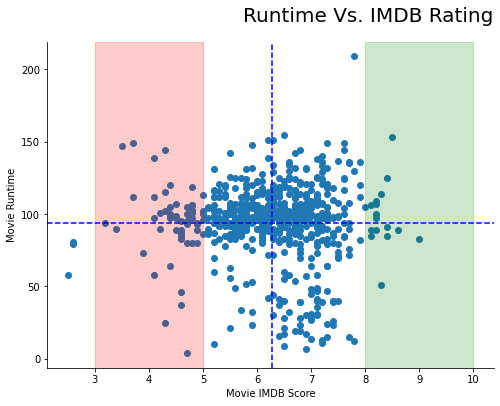

In [48]:
x_vals = netflix['IMDB Score']
y_vals = netflix['Runtime']
x_avg = x_vals.mean()

y_avg = y_vals.mean()
x_avg = x_vals.mean()

plt.figure(figsize=[8,6])
plt.scatter(x_vals, y_vals)

plt.axhline(y=y_avg,linestyle='dashed',color='blue')
plt.axvline(x=x_avg,linestyle='dashed',color='blue')

plt.axvspan(3,5,color='red',alpha=0.2)
plt.axvspan(8,10,color='green',alpha=0.2)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



plt.title('Runtime Vs. IMDB Rating', fontsize = 20, loc='right', pad = 20, color = 'black',)
plt.xlabel('Movie IMDB Score')
plt.ylabel('Movie Runtime')

In [100]:
# x = netflix.loc[(netflix['Release Year']> 2016) & (netflix['Release Year']< 2021),'Release Month']
# y = netflix.loc[(netflix['Release Year']> 2016) & (netflix['Release Year']< 2021),'Release Year']
# z = netflix.loc[(netflix['Release Year']> 2016) & (netflix['Release Year']< 2021),'Title']

x = netflix.loc[:,'Release Month']
y = netflix.loc[:,'Release Year']
z = netflix.loc[:,'Title']

df = pd.crosstab(index=y,columns=x,values=z,aggfunc='count')
df.fillna(0,inplace=True)
df

Release Month,1,2,3,4,5,6,7,8,9,10,11,12
Release Year,,,,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0
2016,0.0,0.0,2.0,2.0,1.0,1.0,4.0,2.0,5.0,8.0,3.0,2.0
2017,5.0,4.0,4.0,7.0,7.0,4.0,3.0,3.0,10.0,9.0,6.0,4.0
2018,4.0,7.0,9.0,10.0,6.0,7.0,5.0,6.0,12.0,9.0,13.0,11.0
2019,7.0,8.0,9.0,9.0,15.0,8.0,6.0,11.0,8.0,18.0,15.0,11.0
2020,5.0,7.0,12.0,17.0,10.0,14.0,15.0,15.0,17.0,31.0,20.0,20.0
2021,16.0,13.0,12.0,18.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Release Month')

In [106]:

fig_hm = go.Figure()
fig_hm.add_trace(go.Heatmap(x=df.columns,
                         y=df.index,
                         z=df.values,
                         colorscale='rdylgn',
                         hovertemplate = 'Movies Released:%{z}',
                         name=''))
fig_hm.update_layout(title_text = 'Number of Originals Released per Month',
           xaxis_title = 'Month',
           yaxis_title ='Year',
           xaxis_type = 'category',
           yaxis_type = 'category',
           xaxis = dict(tickvals = list(range(1,13,1)), ticktext = ['Jan','Feb','Mar','Apr','May',
                                                              'Jun','Jul','Aug','Sep','Oct','Nov','Dec']),
           height = 600, 
           plot_bgcolor='rgba(0,0,0,0)')
fig_hm.show()


In [35]:
netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Rating Quality', 'Film Length Group', 'Release Year', 'Release Month',
       'Release Day'],
      dtype='object')

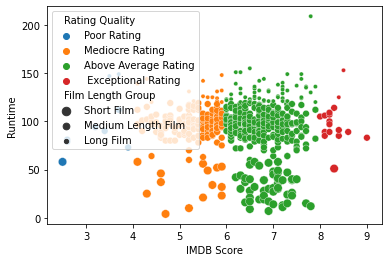

In [48]:
sns.scatterplot(data=netflix,
            x='IMDB Score',y='Runtime',hue='Rating Quality',size='Film Length Group')

plt.show()

- Create subplots for all the for films by film length Group.

<Figure size 576x432 with 0 Axes>

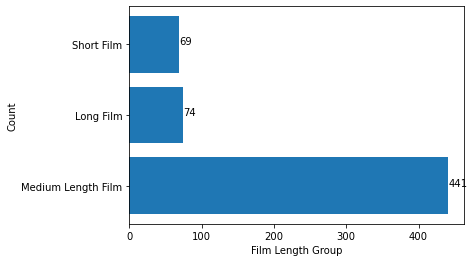

In [86]:

output = netflix['Film Length Group'].value_counts()

plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
p = plt.barh(output.index, output)
ax.set_xlabel('Film Length Group')
ax.set_ylabel('Count')


bar_labels = output

[ax.text(v, i, v) for i,v in enumerate(bar_labels)]

plt.show()

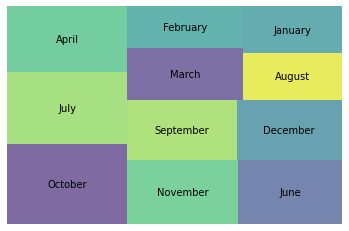

In [93]:
import squarify
Months = netflix['RMonth Text'].value_counts()
squarify.plot(sizes=Months,label=Months.index,alpha=0.7) 
plt.axis('off')
plt.show()

In [112]:
netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Rating Quality', 'Film Length Group', 'Release Year', 'Release Month',
       'Release Day', 'RMonth Text'],
      dtype='object')

In [134]:
##### Final APP

# #############################################################################
import pandas as pd

# plotly 
import plotly.express as px

# dashboards
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from datetime import date
from dash.dependencies import Input, Output

table = netflix[['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Rating Quality', 'Film Length Group', 'Release Year', 'RMonth Text']]
table.rename(columns = {'RMonth Text':'Release Month'}, inplace = True)
table['id'] = table['Title']
table.set_index('id', inplace=True, drop=False)

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1('Netflix Originals Performance Analysis Dashboard', 
            style={'color': 'maroon', 'fontSize': '40px','textAlign':'center'}),
    html.P('''
            This Dashboard provides a summary of the public's reception (IMDB ratings) to all the Netflix originals
            released between 2014 and May 31st 2021. The main metrics that are considered in the analysis are the IMDB Score
            and Runtime of the films. There are other qualitative features included in the dataset that can be viewed on the
            filterable Data Table in tab 2.

            Special thanks to Luis from Kaggle (view profile here: https://www.kaggle.com/luiscorter) for scraping the dataset.
            To actually view the dataset on Kaggle please follow the link presented below: 
            ''',
        style={'textAlign':'center'}),
    html.Ul([
        html.Li(['Link to dataset here: ',
                html.A('Netflix Originals Dataset on Kaggle',
                href='https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores')]),
            ]),


    dbc.Tabs([
        dbc.Tab([
            html.H2('Netflix Originals: Summary Tab',
                     style={'color': 'maroon','fontSize': '20px','textAlign':'center'}),
            
            html.P('''
            This tab presents a summary of characteristics and performance of all netflix original movies released
            from 2014 - 2021. 
            '''),
            html.Div([
                    dcc.Graph(figure = rvsrt_fig)
                    ],style={'padding': '0px 20px 20px 20px'}),
            html.Div([
                    dcc.Graph(figure = fig_relfreq)
                    ],style={ 'width': '30%','display': 'inline-block', 'padding': '0px 20px 20px 20px'}), #, 'padding': '0px 30px 30px 30px'
            html.Div([
                    dcc.Graph(figure = fig_genre)
                    ],style={'width': '30%', 'display': 'inline-block', 'padding': '0px 20px 20px 20px'}),
            html.Div([
                    dcc.Graph(figure = fig_lang)
                    ],style={ 'width': '30%','display': 'inline-block', 'padding': '0px 20px 20px 20px'}),
            html.Div([
                    dcc.Graph(figure = fig_hm)
                    ],style={ 'padding': '0px 20px 20px 20px'}),


            ], label ='Performance Summary tab'),
        
        dbc.Tab([
            html.H1('Filterable Table of Netflix Originals',
                    style={'color': 'maroon','fontSize': '20px','textAlign':'center'}),

            html.P('''
            This table presented below contains all the data for each of the variables in the the Dataset. Feel free to play around and
            search for your favourite Netflix originals to see what their IMDB Rating is as well as other cool qualitative facts about
            the film.
            '''),

            dash_table.DataTable(
                                id='datatable-row-ids',
                                columns=[
                                        {'name': i, 'id': i, 'deletable': True} for i in table.columns
                                        # omit the id column
                                        if i != 'id'
                                ],
                                data=table.to_dict('records'),
                                editable=True,
                                filter_action="native",
                                sort_action="native",
                                sort_mode='multi',
                                row_selectable='multi',
                                row_deletable=True,
                                selected_rows=[],
                                page_action='native',
                                page_current= 0,
                                page_size= 20,
                        ),
                        html.Div(id='datatable-row-ids-container')

            ], label ='Table of All Released Netflix Originals'),
        
        
        dbc.Tab([
            html.Div(
                    [dcc.Slider( id='year-slider',
                        min=netflix['Release Year'].min(),
                        max=netflix['Release Year'].max(),
                        value=netflix['Release Year'].min(),
                        marks={str(year): str(year) for year in netflix['Release Year'].unique()},
                        step=None)            
                ], style={'width': '100%', 'display': 'inline-block', 'padding': '0px 20px 20px 20px'}),
            
            html.Div(
                    [ dcc.Graph(id='tm-rating_qual'),

                ],style={'width': '30%','display': 'inline-block', 'padding': '0px 20px 20px 20px'}),

            
            html.Div(
                    [ dcc.Graph(id='tm-genre'),

                ],style={'width': '30%','display': 'inline-block', 'padding': '0px 20px 20px 20px'}),

            html.Div(
                    [ dcc.Graph(id='tm-length'),

                ],style={'width': '30%','display': 'inline-block', 'padding': '0px 20px 20px 20px'}),             
            
            
            html.Div(
                    [ dcc.Graph(id='imdb summary'),

                ],style={'padding': '0px 20px 20px 20px'}),

            html.Div(
                    [ dcc.Graph(id='movie-scatterplot'),

                ],style={'display': 'inline-block', 'padding': '0px 20px 20px 20px'}),

                        

        ],label ='Year over Year Performance'), 


        dbc.Tab([], label ='Dynamic k-Means Clustering')

    ]),
])

@app.callback(
        Output('tm-genre', 'figure'),
        Input('year-slider', 'value'))

def update_tmgenre(year):
    plotdata = netflix.loc[netflix['Release Year']== year]
    df = pd.DataFrame(plotdata.Genre.value_counts()[:10])
    df.reset_index(inplace=True)
    fig = px.treemap(df, path=['index'], values='Genre')
    fig.update_layout(title_text='Top 10 Genres of Films released in {}'.format(year),
                    title_x=0.5, 
                    title_font=dict(size=20))
    fig.update_traces(textinfo="label + value+percent parent")
    return fig

@app.callback(
        Output('tm-length', 'figure'),
        Input('year-slider', 'value'))

def update_tmgenre(year):
    plotdata = netflix.loc[netflix['Release Year']== year]
    df = pd.DataFrame(plotdata['Film Length Group'].value_counts())
    df.reset_index(inplace=True)
    fig = px.treemap(df, path=['index'], values='Film Length Group')
    fig.update_layout(title_text='Breakdown of Length of Films released in {}'.format(year),
                    title_x=0.5, 
                    title_font=dict(size=20))
    fig.update_traces(textinfo="label + value+percent parent")
    return fig


@app.callback(
        Output('tm-rating_qual', 'figure'),
        Input('year-slider', 'value'))

def update_tmgenre(year):
    plotdata = netflix.loc[netflix['Release Year']== year]
    df = pd.DataFrame(plotdata['Rating Quality'].value_counts())
    df.reset_index(inplace=True)
    fig = px.treemap(df, path=['index'], values='Rating Quality')
    fig.update_layout(title_text='Breakdown of Rating Quality of Films released in {}'.format(year),
                    title_x=0.5, 
                    title_font=dict(size=20))
    fig.update_traces(textinfo="label + value+percent parent")
    return fig



@app.callback(
        Output('imdb summary', 'figure'),
        Input('year-slider', 'value'))
def update_figure(year):
        
        plotdata = netflix.loc[netflix['Release Year']== year].sort_values(by='IMDB Score', ascending = False)
        data = plotdata[0:20]
        data.reset_index(inplace=True)
        
        fig = px.bar(data[0:10],x='IMDB Score', y='Title', orientation = 'h')


        fig = px.bar(data[0:10], x='IMDB Score', y='Title', hover_data=['IMDB Score', 'Film Length Group'],
                    color='Film Length Group')
        fig.update_layout(title_text='Top 10 Netflix Originals Released in {} w/ Highest IMDB Scores'.format(year),
                        title_x=0.5, 
                        title_font=dict(size=20),
                        plot_bgcolor = 'white',
                        xaxis_title = 'IMDB Score',
                        yaxis_title = '')
        return fig

@app.callback(
        Output('movie-scatterplot', 'figure'),
        Input('year-slider', 'value'))
def update_scatter(year):
    plotdata = netflix.loc[netflix['Release Year']== year]
    fig = px.scatter(plotdata, 
                        x="Premiere", 
                        y="IMDB Score", 
                        color="Film Length Group",
                        hover_data=['Title',"Genre",'IMDB Score','Runtime'])
    fig.update_traces(marker_size=6)
    fig.update_layout(
        title="IMDB Score for All Netflix Originals Released in {}".format(year),
        xaxis=dict(
            showgrid=False,
            showline=True,
            linecolor='rgb(102, 102, 102)',
            tickfont_color='rgb(102, 102, 102)',
            showticklabels=True,
            ticks='outside',
            tickcolor='rgb(102, 102, 102)',
        ),
        margin=dict(l=140, r=60, b=70, t=100), 
        
        legend=dict(
            font_size=10,
            yanchor='top',
            xanchor='right',
            bgcolor = 'white', 
            bordercolor  = 'white',
            borderwidth = 0
        ),
        width=1750,
        height= 650,
        paper_bgcolor='white',
        plot_bgcolor='white',
        hovermode='closest',
    )
    fig.update_traces(marker_size=10)
    return fig


@app.callback(
    Output('datatable-row-ids-container', 'children'),
    Input('datatable-row-ids', 'derived_virtual_row_ids'),
    Input('datatable-row-ids', 'selected_row_ids'),
    Input('datatable-row-ids', 'active_cell'))
def update_graphs(row_ids, selected_row_ids, active_cell):
    selected_id_set = set(selected_row_ids or [])

    if row_ids is None:
        dff = table
        # pandas Series works enough like a list for this to be OK
        row_ids = table['id']
    else:
        dff = table.loc[row_ids]

    active_row_id = active_cell['row_id'] if active_cell else None

    colors = ['#FF69B4' if id == active_row_id
              else '#7FDBFF' if id in selected_id_set
              else '#0074D9'
              for id in row_ids]
    return [
        dcc.Graph(
            id=column + '--row-ids',
            figure={
                'data': [
                    {
                        'x': table['Title'],
                        'y': table[column],
                        'type': 'bar',
                        'marker': {'color': colors},
                    }
                ],
                'layout': {
                    'xaxis': {'automargin': True},
                    'yaxis': {
                        'automargin': True,
                        'title': {'text': column}
                    },
                    'height': 250,
                    'margin': {'t': 10, 'l': 10, 'r': 10},
                },
            },
        )
        # check if column exists - user may have deleted it
        # If `column.deletable=False`, then you don't
        # need to do this check.
        for column in ['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language', 'Rating Quality', 'Film Length Group', 'Release Year', 'Release Month'] if column in table
    ]
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


C:\Users\Young Harambe\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Young Harambe\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

### Template Dashboard

In [ ]:
# #############################################################################
import pandas as pd

# plotly 
import plotly.express as px

# dashboards
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from datetime import date
from dash.dependencies import Input, Output

table = netflix[['Title','Genre','Runtime','IMDB Score','Film Length Group', 'Release Year']]
table['id'] = table['Title']
table.set_index('id', inplace=True, drop=False)

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1('GSBA 545 Final Exam Prep Dashboard ', 
            style={'color': 'maroon', 'fontSize': '40px','textAlign':'center'}),#


    dbc.Tabs([
        dbc.Tab([
            html.H2('Tab 1: Top 5 Social Media Company Stocks Performance Visualization',
                     style={'textAlign':'center'}),
            
            html.P('''
            This tab is dedicated to the investigation of the stock performance of the following five top Social Media Stocks.
            The dataset is sourced from Yahoo Finance and contains data on stock performance starting on January 1st, 2018 and
            ending on November 30th 2021.
            '''),
            
            html.Ul([
                html.Li(['Meta Platforms Inc($FB): ',
                        html.A('Meta Wikipedia Page',
                        href='https://en.wikipedia.org/wiki/Meta_Platforms')]),
                html.Li(['Twitter ($TWTR): ',
                        html.A('Twitter Wikipedia Page',
                        href='https://en.wikipedia.org/wiki/Twitter')]),
                html.Li(['Snap, Inc. ($SNAP): ',
                        html.A('Snap Wikipedia Page',
                        href='https://en.wikipedia.org/wiki/Snap_Inc')]),
                html.Li(['Etsy, Inc. ($ETSY): ',
                        html.A('Etsy Wikipedia Page',
                        href='https://en.wikipedia.org/wiki/Etsy')]),
                html.Li(['Microsoft ($MSFT): ',
                        html.A('Microsoft Wikipedia Page',
                        href='https://en.wikipedia.org/wiki/Microsoft')])
                    ]),
            
            dcc.Graph(id='2019 - 2020 Performance Line Chart', figure = fig2)
            ], label ='Social Media Stocks'),
        
        
        dbc.Tab([
            html.H1('Reaction from the General Public to Netflix Movies (2015-2021)',
                    style={'textAlign':'center'}),

            html.Div([ dcc.Graph(id='imdb summary'),
                ],style={'width': '50%', 'float': 'right', 'display': 'inline-block'}),

            html.Div([dcc.Slider( id='year-slider',
                        min=netflix['Release Year'].min(),
                        max=netflix['Release Year'].max(),
                        value=netflix['Release Year'].min(),
                        marks={str(year): str(year) for year in netflix['Release Year'].unique()},
                        step=None)            
                ], style={'width': '50%', 'display': 'inline-block', 'padding': '0px 20px 20px 20px'}),
            html.Div([dash_table.DataTable(
                                        id='datatable-row-ids',
                                        columns=[
                                                {'name': i, 'id': i, 'deletable': True} for i in table.columns
                                                # omit the id column
                                                if i != 'id'
                                        ],
                                        data=netflix.to_dict('records'),
                                        editable=True,
                                        filter_action="native",
                                        sort_action="native",
                                        sort_mode='multi',
                                        row_selectable='multi',
                                        row_deletable=True,
                                        selected_rows=[],
                                        page_action='native',
                                        page_current= 0,
                                        page_size= 20,
                        ),
                        html.Div(id='datatable-row-ids-container')
                ],style={'width': '40%',  'display': 'inline-block'})

        ],label ='Netflix Movie Ratings'),       
        dbc.Tab([], label ='EPL 2020-2021 Clusters')

    ]),
])

@app.callback(
        Output('imdb summary', 'figure'),
        Input('year-slider', 'value'))
def update_figure(year):
        
        plotdata = netflix.loc[netflix['Release Year']== year].sort_values(by='IMDB Score', ascending = False)
        data = plotdata[0:20]
        data.reset_index(inplace=True)
        
        fig = px.bar(data[0:10],x='IMDB Score', y='Title', orientation = 'h')


        fig = px.bar(data[0:10], x='IMDB Score', y='Title', hover_data=['IMDB Score', 'Film Length Group'],
                    color='Film Length Group')
        fig.update_layout(title_text='10 Netflix Movies w/ Highest Ratings in {}'.format(year),
                        title_x=0.5, 
                        title_font=dict(size=20),
                        plot_bgcolor = 'white',
                        xaxis_title = 'IMDB Score',
                        yaxis_title = '')
        return fig
@app.callback(
    Output('datatable-row-ids-container', 'children'),
    Input('datatable-row-ids', 'derived_virtual_row_ids'),
    Input('datatable-row-ids', 'selected_row_ids'),
    Input('datatable-row-ids', 'active_cell'))
def update_graphs(row_ids, selected_row_ids, active_cell):
    # When the table is first rendered, `derived_virtual_data` and
    # `derived_virtual_selected_rows` will be `None`. This is due to an
    # idiosyncrasy in Dash (unsupplied properties are always None and Dash
    # calls the dependent callbacks when the component is first rendered).
    # So, if `rows` is `None`, then the component was just rendered
    # and its value will be the same as the component's dataframe.
    # Instead of setting `None` in here, you could also set
    # `derived_virtual_data=df.to_rows('dict')` when you initialize
    # the component.
    selected_id_set = set(selected_row_ids or [])

    if row_ids is None:
        dff = table
        # pandas Series works enough like a list for this to be OK
        row_ids = table['id']
    else:
        dff = table.loc[row_ids]

    active_row_id = active_cell['row_id'] if active_cell else None

    colors = ['#FF69B4' if id == active_row_id
              else '#7FDBFF' if id in selected_id_set
              else '#0074D9'
              for id in row_ids]

    return [
        dcc.Graph(
            id=column + '--row-ids',
            figure={
                'data': [
                    {
                        'x': table['Title'],
                        'y': table[column],
                        'type': 'bar',
                        'marker': {'color': colors},
                    }
                ],
                'layout': {
                    'xaxis': {'automargin': True},
                    'yaxis': {
                        'automargin': True,
                        'title': {'text': column}
                    },
                    'height': 250,
                    'margin': {'t': 10, 'l': 10, 'r': 10},
                },
            },
        )
        # check if column exists - user may have deleted it
        # If `column.deletable=False`, then you don't
        # need to do this check.
        for column in ['Genre','Runtime','IMDB Score','Film Length Group', 'Release Year'] if column in table
    ]
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)
